In [12]:
# Random Forest — keep 'safety' as a single feature (no one-hot encoding for features)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Load data and set column names (adjust if your file already has headers)
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [26]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [27]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [28]:
# Quick sanity checks
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (1727, 7)
Columns: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [15]:
# Features X and target y (class is the label we want to predict)
X = df.drop(columns='class').copy()   # KEEP safety as a single column here
y = df['class'].copy()

In [16]:
# Encode each categorical feature into a single integer label (one column per feature)
le = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    X_encoded[col] = le.fit_transform(X[col].astype(str))

In [17]:
# Now X_encoded has columns: buying, maint, doors, persons, lug_boot, safety (each numeric)
print("\nEncoded features preview:\n", X_encoded.head())


Encoded features preview:
    buying  maint  doors  persons  lug_boot  safety
0       3      3      0        0         2       2
1       3      3      0        0         2       0
2       3      3      0        0         1       1
3       3      3      0        0         1       2
4       3      3      0        0         1       0


In [18]:
# Train-test split (stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.30, random_state=42, stratify=y
)

In [29]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict & evaluate
y_pred = clf.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9788

Classification Report:
               precision    recall  f1-score   support

         acc       0.97      0.93      0.95       115
        good       0.91      0.95      0.93        21
       unacc       0.98      1.00      0.99       363
       vgood       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.97      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519



In [31]:
# Feature importances using original (single) feature names
fi = pd.Series(clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("\nFeature importances:\n", fi)


Feature importances:
 safety      0.274969
persons     0.227147
buying      0.180355
maint       0.153538
lug_boot    0.092352
doors       0.071638
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_38736\2501209878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette='viridis')


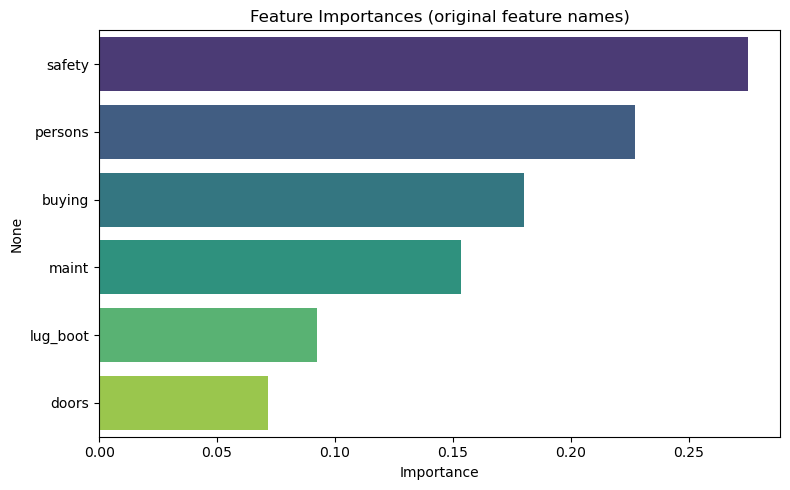

In [32]:
# Plot feature importances (shows original column names)
plt.figure(figsize=(8,5))
sns.barplot(x=fi.values, y=fi.index, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importances (original feature names)')
plt.tight_layout()
plt.show()
